# Importar librerías

In [1]:
'''Importar las librerías necesarias'''
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
import itertools
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed

# Ruido de fondo

In [2]:
'''Establecer rutas a los datos de entrada y salida de ruido de fondo'''
INPUT_DIR = './ReconocimientosRuidos/sonidos/ruidofondo'
OUTPUT_DIR = './ReconocimientosRuidos/imagenes/'

'''Imprimir 5 sonidos de ruido de fondo'''
parent_list = os.listdir(INPUT_DIR)
for i in range(5):
    print(parent_list[i])

doing_the_dishes.wav
dude_miaowing.wav
exercise_bike.wav
pink_noise.wav
RuidosVarios.wav


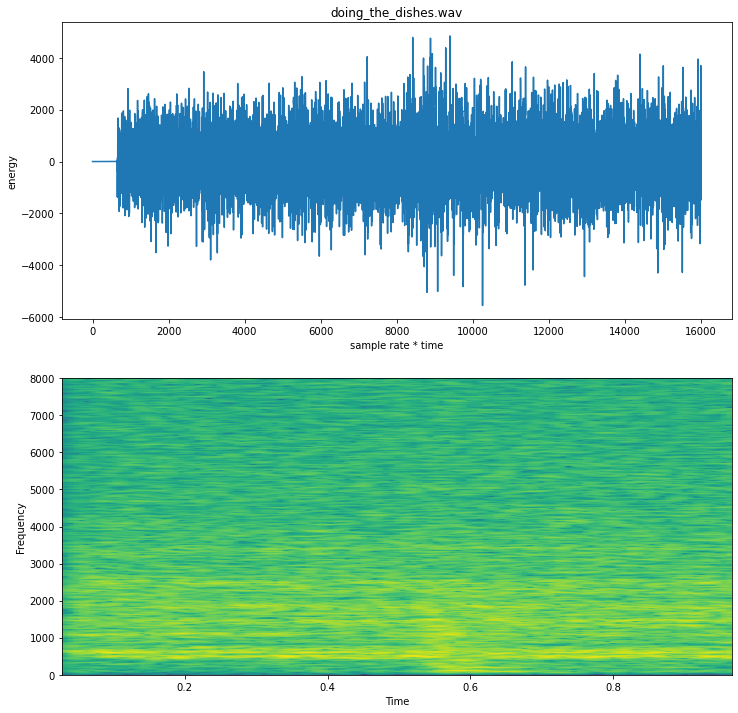

In [3]:
'''Dibujar o trazar un sonido en forma de onda y espectro de frecuencia'''
for i in range(1): 
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

In [4]:
'''Función para obtener información de los espectogramas de los sonidos de ruido de fondo'''
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

'''Para cada grabación o sonido, hay un espectrograma y se lo guarda en una 
   carpeta establecida /ReconocimientosRuidos/imagenes/ruidofondo de tipo .png'''
if not os.path.exists(os.path.join(OUTPUT_DIR, 'ruidofondo')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'ruidofondo'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'ruidofondo'))
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()

'''Listar 5 imágenes de ruidos de fondo'''             
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'ruidofondo'))
print("Imágenes (ruidofondo): \n")
for i in range(5):
    print(path_list[i])

Imágenes (ruidofondo): 

doing_the_dishes.png
dude_miaowing.png
exercise_bike.png
pink_noise.png
RuidosVarios.png


# Motosierras

In [5]:
'''Establecer rutas a los datos de entrada y salida de motosierras'''
INPUT_DIR = './ReconocimientosRuidos/sonidos/motosierra'
OUTPUT_DIR = './ReconocimientosRuidos/imagenes/'

'''Imprimir 5 sonidos de motosierras'''
parent_list = os.listdir(INPUT_DIR)
for i in range(5):
    print(parent_list[i])

motosierra_1.wav
motosierra_10.wav
motosierra_100.wav
motosierra_101.wav
motosierra_102.wav


C:\Users\Personal\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


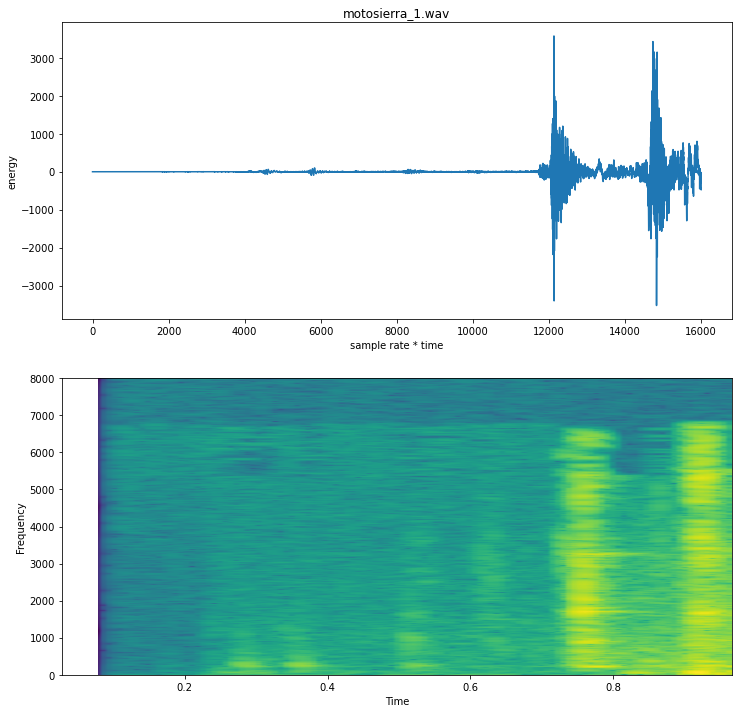

In [6]:
'''Dibujar o trazar un sonido en forma de onda y espectro de frecuencia'''
for i in range(1): 
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

In [7]:
'''Función para obtener información de los espectogramas de los sonidos de motosierras'''
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

'''Para cada grabación o sonido, hay un espectrograma y se lo guarda en una 
   carpeta establecida /ReconocimientosRuidos/imagenes/motosierra de tipo .png'''
if not os.path.exists(os.path.join(OUTPUT_DIR, 'motosierra')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'motosierra'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'motosierra'))
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()

'''Listar 5 imágenes de motosierras'''             
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'motosierra'))
print("Imágenes (motosierra): \n")
for i in range(5):
    print(path_list[i])

Imágenes (motosierra): 

motosierra_1.png
motosierra_10.png
motosierra_100.png
motosierra_101.png
motosierra_102.png


# Tráfico

In [8]:
'''Establecer rutas a los datos de entrada y salida de tráfico'''
INPUT_DIR = './ReconocimientosRuidos/sonidos/trafico'
OUTPUT_DIR = './ReconocimientosRuidos/imagenes/'

'''Imprimir 5 sonidos de tráfico'''
parent_list = os.listdir(INPUT_DIR)
for i in range(5):
    print(parent_list[i])

traficoM40_1.wav
traficoM40_10.wav
traficoM40_100.wav
traficoM40_101.wav
traficoM40_102.wav


C:\Users\Personal\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


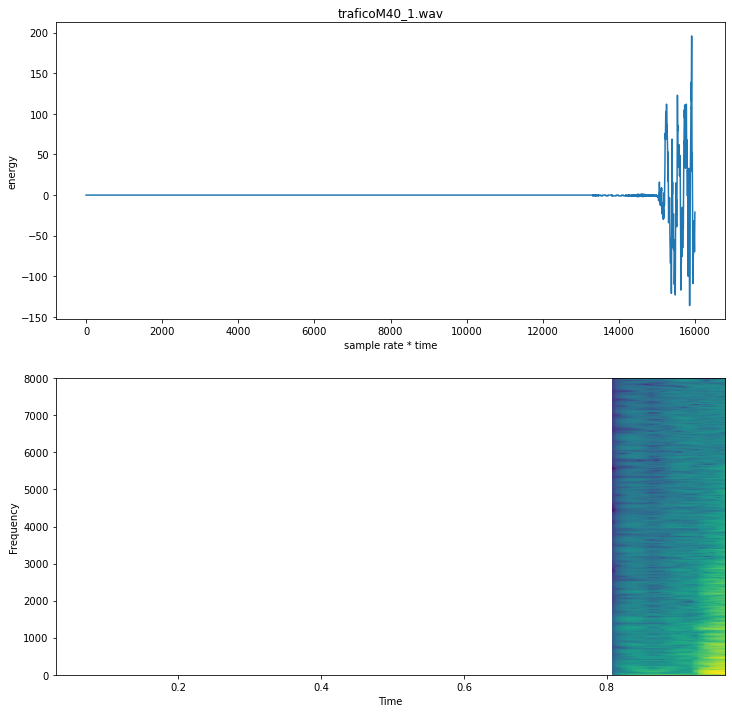

In [9]:
'''Dibujar o trazar un sonido en forma de onda y espectro de frecuencia'''
for i in range(1): 
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

In [10]:
'''Función para obtener información de los espectogramas de los sonidos de tráfico'''
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

'''Para cada grabación o sonido, hay un espectrograma y se lo guarda en una 
   carpeta establecida /ReconocimientosRuidos/imagenes/trafico de tipo .png'''
if not os.path.exists(os.path.join(OUTPUT_DIR, 'trafico')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'trafico'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'trafico'))
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()
    
'''Listar 5 imágenes de tráfico'''
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'trafico'))
print("Imágenes (trafico): \n")
for i in range(5):
    print(path_list[i])

Imágenes (trafico): 

traficoM40_1.png
traficoM40_10.png
traficoM40_100.png
traficoM40_101.png
traficoM40_102.png


# Televisión

In [11]:
'''Establecer rutas a los datos de entrada y salida de televisión'''
INPUT_DIR = './ReconocimientosRuidos/sonidos/television'
OUTPUT_DIR = './ReconocimientosRuidos/imagenes/'

'''Imprimir 5 sonidos de televisión'''
parent_list = os.listdir(INPUT_DIR)
for i in range(5):
    print(parent_list[i])

television_1.wav
television_10.wav
television_100.wav
television_101.wav
television_102.wav


C:\Users\Personal\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


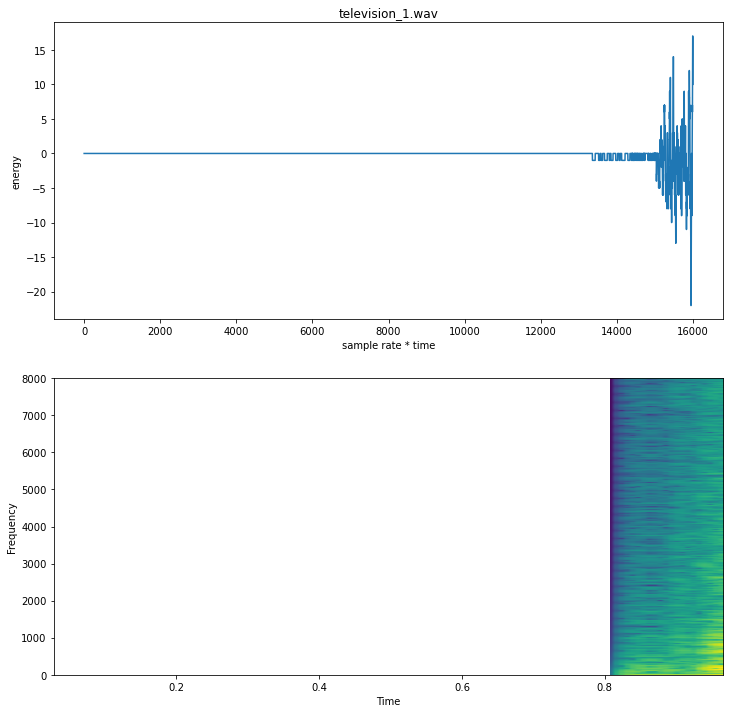

In [12]:
'''Dibujar o trazar un sonido en forma de onda y espectro de frecuencia'''
for i in range(1): 
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

In [13]:
'''Función para obtener información de los espectogramas de los sonidos de la televisión'''
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

'''Para cada grabación o sonido, hay un espectrograma y se lo guarda en una 
   carpeta establecida /ReconocimientosRuidos/imagenes/television de tipo .png'''
if not os.path.exists(os.path.join(OUTPUT_DIR, 'television')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'television'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'television'))
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()
    
'''Listar 5 imágenes de televisión'''
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'television'))
print("Imágenes (televisión): \n")
for i in range(5):
    print(path_list[i])

Imágenes (televisión): 

television_1.png
television_10.png
television_100.png
television_101.png
television_102.png


# Preparar los datos


In [14]:
'''Declarar las constantes'''
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 10

'''Crear un conjunto de datos que contenga los espectrogramas de entrenamiento'''
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

'''Crear un conjunto de datos que contenga el espectrograma de validación'''
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 1819 files belonging to 4 classes.
Using 1456 files for training.
Found 1819 files belonging to 4 classes.
Using 363 files for validation.


Let's quickly visualize a few of the generated spectograms and their labels.

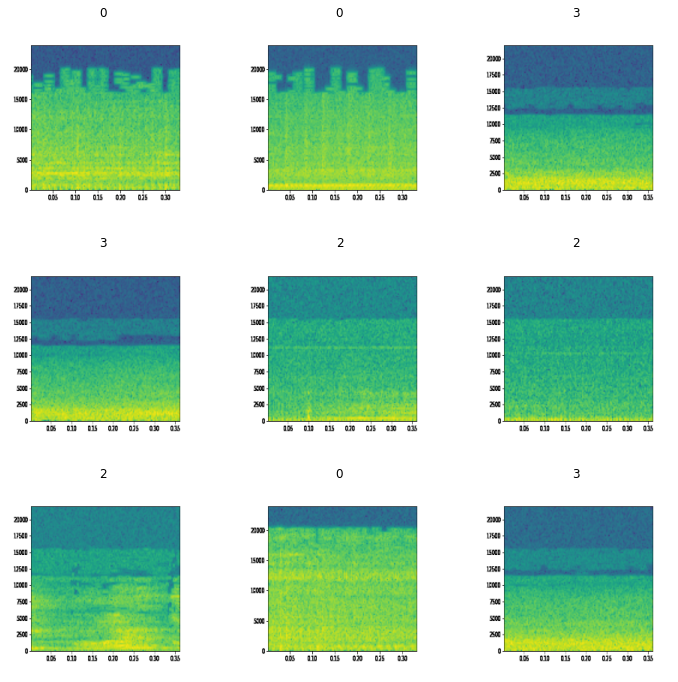

In [15]:
'''Visualizar algunos espectogramas con sus respectivas etiquetas'''
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

Before we can build our model and start training, we need to apply one simple augmentation the dataset and that is rescaling. We rescale an input in the (0, 255) range to be in the (0,1) range.

In [16]:
'''Función para preparar nuestros conjuntos de datos para el modelado.'''
def prepare(ds, augment=False):
    '''Definir nuestra única transformación'''
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    '''Aplicar el cambio de escala a ambos conjuntos de datos y el aumento solo al conjunto del entrenamiento'''
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [18]:
'''Crear el modelo CNN-BiLSTM'''
model = tf.keras.models.Sequential()

'''Crear el modelo CNN'''
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

'''BiLSTM'''
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

'''Ejecutar el modelo de CNN-BiLSTM'''
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

'''Ejecutar 10 Epoch'''
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset,batch_size=40, verbose=1, shuffle =True)

Epoch 1/10
46/46 [==============================] - 1179s 25s/step - loss: 1.2671 - accuracy: 0.3496 - val_loss: 1.1572 - val_accuracy: 0.2810
Epoch 2/10
46/46 [==============================] - 1495s 33s/step - loss: 1.1489 - accuracy: 0.3853 - val_loss: 1.1327 - val_accuracy: 0.2920
Epoch 3/10
46/46 [==============================] - 1596s 35s/step - loss: 1.1313 - accuracy: 0.3901 - val_loss: 1.1261 - val_accuracy: 0.4215
Epoch 4/10
46/46 [==============================] - 1806s 39s/step - loss: 1.0559 - accuracy: 0.4423 - val_loss: 0.5062 - val_accuracy: 0.7135
Epoch 5/10
46/46 [==============================] - 1553s 34s/step - loss: 0.5110 - accuracy: 0.6978 - val_loss: 2.1889 - val_accuracy: 0.2810
Epoch 6/10
46/46 [==============================] - 1580s 34s/step - loss: 0.5012 - accuracy: 0.6834 - val_loss: 0.4410 - val_accuracy: 0.7135
Epoch 7/10
46/46 [==============================] - 2318s 51s/step - loss: 0.4455 - accuracy: 0.6909 - val_loss: 0.4383 - val_accuracy: 0.7135

# Evaluación

Para evaluar nuestra CNN-BiLSTM, observaremos los puntajes de pérdida y precisión para ver qué tan bien progresó el entrenamiento y verificar si hay algún ajuste insuficiente o excesivo. Las evaluaciones se basan tanto en el conjunto de entrenamiento como en el de validación. Parece que después de 8 épocas, la pérdida y la precisión del conjunto de validación se estancan alrededor de la marca de 0,40 y 0,70, respectivamente.

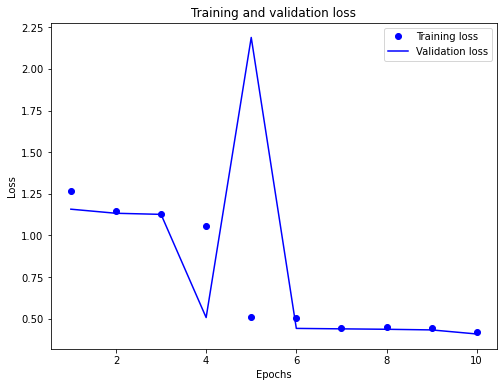

In [19]:
'''Graficar la pérdida del entrenamiento y validación.'''
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

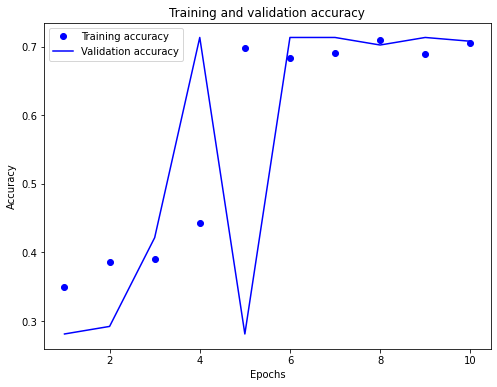

In [20]:
'''Graficar la precisión del entrenamiento y la validación.'''
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Métricas de evaluación

In [23]:
'''Calcular el acurracy final del modelo'''
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.407507, final accuracy: 0.707989


# Matriz de confusión

12/12 [==============================] - 102s 8s/step - loss: 0.4075 - accuracy: 0.7080
n Test_Accuracy: 0.707988977432251
12/12 [==============================] - 100s 8s/step
confusion matrix
[[153   0   0]
 [  0   2   0]
 [  0   0 208]]


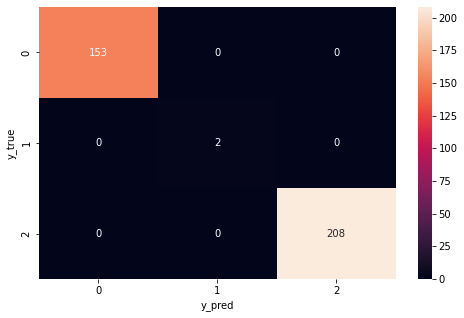

In [22]:
import seaborn as sns
accuracy = model.evaluate(valid_dataset)
print('n', 'Test_Accuracy:', accuracy[1])
pred = model.predict(valid_dataset)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()